In [1]:
import numpy as np
import pandas as pd
import os
from datetime import datetime
import matplotlib.pyplot as plt

# 忽略警告訊息
import warnings

warnings.filterwarnings('ignore')
import matplotlib.cm as cm
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [2]:
# 設定 data_path
dir_data = './data/'

# 讀取檔案
f_app = os.path.join(dir_data, 'merge_simple.csv')
print('Path of read in data: %s' % (f_app))
data = pd.read_csv(f_app)
data.head()

Path of read in data: ./data/merge_simple.csv


,Unnamed: 0,Date,Close_US,Close_SP
0,0,1985/11/21,127.56,201.410004
1,1,1985/11/22,126.63,201.520004
2,2,1985/11/25,126.64,200.350006
3,3,1985/11/26,126.17,200.669998
4,4,1985/11/27,126.16,202.539993


In [3]:
print('Information of the dataset: ')
display(data.info())

Information of the dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8336 entries, 0 to 8335
Data columns (total 4 columns):
Unnamed: 0    8336 non-null int64
Date          8336 non-null object
Close_US      8336 non-null float64
Close_SP      8336 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 260.6+ KB


None

In [4]:
print('Number of missing values in each column: ')
display(pd.isnull(data).sum())

Number of missing values in each column: 


Unnamed: 0    0
Date          0
Close_US      0
Close_SP      0
dtype: int64

In [5]:
close = data.iloc[:,2:4]
close

,Close_US,Close_SP
0,127.560,201.410004
1,126.630,201.520004
2,126.640,200.350006
3,126.170,200.669998
4,126.160,202.539993
5,125.180,202.169998
6,125.580,200.460007
7,126.040,200.860001
8,125.440,204.229996
9,125.520,203.880005


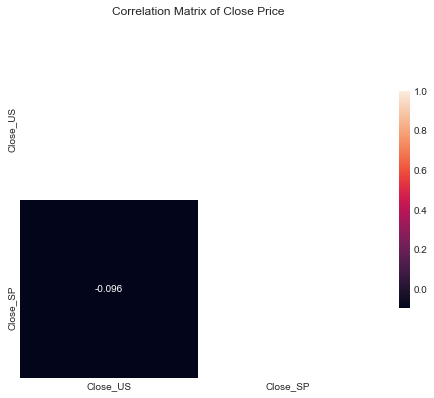

In [6]:
# calculate correlation matrix
corr = close.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# plot correlation matrix
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corr, mask=mask, square=True, linewidths=.5, annot=True, 
            cbar_kws={"shrink": .5})
ax.set_title('Correlation Matrix of Close Price');

Text(0.5,1,'Stock')

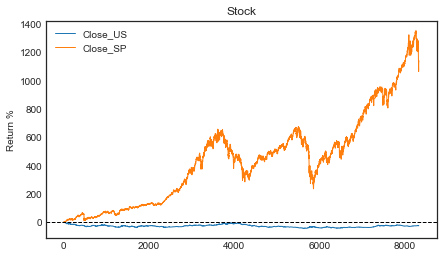

In [7]:
#sinple return
close_copy = close.copy() # make a copy of the close dataframe to make changes

close_copy = (close_copy - close_copy.ix[0, :])/close_copy.ix[0, :]*100 

# plot price ratio over time
close_copy.plot(legend=True, figsize=(7, 4), linewidth=1)
plt.axhline(y=0, linestyle='dashed', color='black', linewidth=1)
plt.xlabel('')
plt.ylabel('Return %')
plt.title('Stock')

In [8]:
# daily returns of these stocks
close_copy = close.copy() 
daily_retn = close_copy.pct_change().dropna()
print('First 5 rows of the daily return dataset: ')
display(daily_retn.head())

First 5 rows of the daily return dataset: 


,Close_US,Close_SP
1,-0.007291,0.000546
2,0.000079,-0.005806
3,-0.003711,0.001597
4,-0.000079,0.009319
5,-0.007768,-0.001827


In [9]:
print('Statistics of the daily return for selected stocks: ')
display(daily_retn.describe())

Statistics of the daily return for selected stocks: 


,Close_US,Close_SP
count,8335.000000,8335.000000
mean,-0.000019,0.000367
std,0.005487,0.011324
min,-0.029510,-0.204669
25%,-0.003143,-0.004350
50%,0.000000,0.000585
75%,0.003036,0.005583
max,0.034155,0.115800


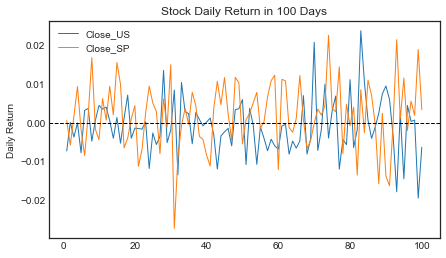

In [10]:
# plot daily return for 100 day period for clarity
daily_retn.iloc[:100].plot(legend=True, figsize=(7, 4), linewidth=1)
plt.axhline(y=0, linestyle='dashed', color='black', linewidth=1)
plt.ylabel('Daily Return')
plt.xlabel('')
plt.title('Stock Daily Return in 100 Days');

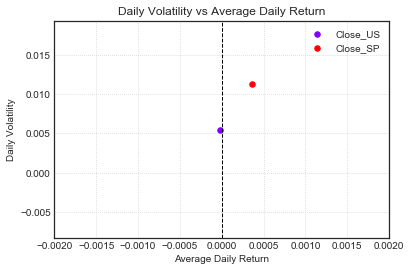

In [11]:
# plot daily volatility vs average daily return
colors = cm.rainbow(np.linspace(0, 1, len(daily_retn.columns)))
fig, ax = plt.subplots(figsize=(6, 4))

for l, x, y, c in zip(daily_retn.columns, 
                      daily_retn.mean(), 
                      daily_retn.std(), 
                      colors):
    plt.scatter(x, y, color=c, s=30, label=l)

plt.axvline(x=0, linewidth=1, linestyle='dashed', color='black')

ax.grid(True, linestyle=':', linewidth=0.75)
plt.xlim([-0.002, 0.002])
plt.xlabel('Average Daily Return')
plt.ylabel('Daily Volatility')
plt.title('Daily Volatility vs Average Daily Return')
plt.legend();